# Monitor de consulta

Describir las funciones del monitor


In [42]:
import os, json, yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import modulos.consultas as consultas

from ipywidgets import widgets

In [43]:
# Paths absolutos
__file__ = 'monitor_consulta.ipynb'
CURRENT = os.path.dirname(os.path.abspath(__file__))
ROOT = os.path.dirname(CURRENT)

# Archivo de configuración
with open(os.path.join(ROOT, 'config.yaml'), 'r') as f:
    config = yaml.safe_load(f)
f.close()

# Paths de datos
TIEMPO_PATH = os.path.join(ROOT, config['datos']['tiempo'])
REGION_PATH = os.path.join(ROOT, config['datos']['region'])
RELACI_PATH = os.path.join(ROOT, config['etl']['relacionados'])

# Interés en el tiempo
Carga de datos

In [3]:
with open(file=TIEMPO_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [4]:
# Criterios búsqueda
with open(file=os.path.join(ROOT, config['datos']['criterios']), mode='r') as f:
    criterios_busqueda = [row.strip() for row in f]        
f.close()

# Criterios consultados
consultados = consultas.criterios_existentes(file=TIEMPO_PATH)

**PCC**

In [5]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 85.11%


## Exploración tabular


In [6]:
def ver_tiempo(criterio):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    
    return pd.DataFrame(consulta).head()

# consultas = list(contenido[0].keys())
# consultas.remove("criterio")

widgets.interact(ver_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_tiempo(criterio)>

## Visualización inicial

In [7]:
def plot_tiempo(criterio):
    # Filtro de datos
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    consulta = contenido[idx_criterio]['contenidos']
    over_time = pd.DataFrame(consulta)
    over_time['fecha'] = pd.to_datetime(over_time['fecha'])
    
    # Visualización
    fig, ax = plt.subplots(figsize=(16,6))

    scatter = ax.scatter(x=over_time['fecha'], y=over_time['valor'], c=over_time['parcial'], cmap='Paired')
    ax.plot(over_time['fecha'], over_time['valor'], color='black', alpha=0.25)

    #Anotaciones y estilo
    ax.set_title(label=f'Interés a lo largo del tiempo - {criterio.title()}\nÚltimos {config["etl"]["anios"]} años', fontsize=14, loc='left')
    ax.legend(*scatter.legend_elements(), loc="upper left", title="Parcial")
    ax.grid(alpha=0.1)

    plt.show()

In [8]:
widgets.interact(plot_tiempo,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False)
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.plot_tiempo(criterio)>

# Interés región
Carga de datos

In [9]:
with open(file=REGION_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Porcentaje de criterios consultados (PCC)

$$PCC = \frac{\#\{criterios\,consultados\}}{\#\{criterios\,búsqueda\}}$$

In [10]:
# Criterios consultados
consultados = consultas.criterios_existentes(file=REGION_PATH)

**PCC**

In [11]:
pcc_tiempo = len(consultados) / len(criterios_busqueda)
print(f'Pct. Criterios Consultados: {pcc_tiempo*100:.2f}%')

Pct. Criterios Consultados: 100.00%


## Exploración tabular


In [12]:
def ver_region(criterio, periodo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']
    
    return pd.DataFrame(consulta).head()

widgets.interact(ver_region,
                 criterio=widgets.Dropdown(
                     options=[contenido[k]['criterio'] for k in range(len(contenido))],
                     description='Criterio',
                     disabled=False),
                 periodo=widgets.IntSlider(
                     min=0,
                     max=len(contenido[0]["contenidos"])-1,
                     step=1,
                     description='Periodo')
                )

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_region(criterio, periodo)>

# Temas relacionados
Carga de datos

In [13]:
with open(file=RELACI_PATH, mode='r') as file:
    contenido = json.load(file)
file.close()

## Inspección tabular

Esta sección es para tener un visualizador rápido de los datos de origen, para que se puede entender su estructura.

In [14]:
def ver_relacionados(criterio, periodo, tipo):
    criterios = [contenido[k]['criterio'] for k in range(len(contenido))]
    idx_criterio = criterios.index(criterio)
    
    consulta = contenido[idx_criterio]['contenidos']
    consulta = consulta[periodo]['consulta']

    consulta = pd.DataFrame(consulta[tipo])
    
    return pd.DataFrame(consulta).head()

widgets.interact(
    ver_relacionados,
    criterio=widgets.Dropdown(
        options=[contenido[k]['criterio'] for k in range(len(contenido))],
        description='Criterio',
        disabled=False),
    periodo=widgets.IntSlider(
        min=0,
        max=len(contenido[0]["contenidos"])-1,
        step=1,
        description='Periodo'),
    tipo=widgets.Dropdown(
        options=['top','aumento'],
        description='Tipo',
        disabled=False)                
)

interactive(children=(Dropdown(description='Criterio', options=('inai', 'semanas cotizadas', 'expediente medic…

<function __main__.ver_relacionados(criterio, periodo, tipo)>

## Análisis exploratorio

¿Cuántas palabras únicas hay en todo el corpus?

Independientemente del periodo del lote, el criterio de búsqueda, o si se trata de un tema relacionado top o en aumento, las palabras que han surgido en los resultados de búsqueda son:

In [15]:
corpus = list()
n_criterios = len(contenido)
for id_criterio in range(n_criterios):
    
    # Extraer lotes de consulta
    lotes = contenido[id_criterio]['contenidos']
    n_lotes = len(lotes)
    
    for id_lote in range(n_lotes):
        
        # Extraer el tipo de consulta del lote
        tipos = lotes[id_lote]['consulta']

        for tipo in tipos.keys():
            try:
                # Agregar token a corpus
                for doc_ in tipos[tipo]['descripcion'].values():
                    [corpus.append(word) for word in doc_ if word not in corpus]

            except TypeError:
                continue

corpus = {'token':corpus}
len(corpus['token'])

1236

### Frecuencia de palabras

Dado que se estructuraron las cosas de modo que se pudiera hacer un análisis por lotes de tiempo, entonces el análisis de n-gramas debe satisfacer esta característica.

Para efectos de análisis, primero se deben consolidar las consultas por lote de tiempo en una sola tabla, para ello:

In [16]:
# Para iterar en for loops anidados
from itertools import product

In [25]:
# Dataframe de resultados
criterios_lote = pd.DataFrame(columns=['descripcion','tipo','inicio','fin','lote','criterio','id_criterio'])

# Indicador del lote
id_lote = 0

# Iteradores
criterios = range(len(contenido))
tipos = range(len(contenido[0]['contenidos'][id_lote]['consulta']))

for id_criterio, id_tipo in product(criterios, tipos):
    # Parámetros de consulta en JSON
    CRITERIO = contenido[id_criterio]['criterio']
    LOTE = contenido[id_criterio]['contenidos'][id_lote]
    INICIO = LOTE['fecha_inicio']
    FIN = LOTE['fecha_fin']
    TIPO = list( LOTE['consulta'].keys() )[id_tipo]

    # Transformación de datos
    df_ = (
        pd.DataFrame(LOTE['consulta'][TIPO])
        .filter(items=['descripcion'])
        .assign(
            tipo = TIPO
            ,inicio = INICIO
            ,fin = FIN
            ,lote = id_lote
            ,criterio = CRITERIO
            ,id_criterio = id_criterio
        )
    )

    # Agregar resultados a conjunto de análisis
    criterios_lote = pd.concat([criterios_lote, df_], axis=0)

criterios_lote

,descripcion,tipo,inicio,fin,lote,criterio,id_criterio
0,"[red, social]",aumento,2022-11-20,2023-02-20,0,inai,0
1,"[constitucion, politica, unidos, mexicanos]",aumento,2022-11-20,2023-02-20,0,inai,0
2,"[archivo, documentos]",aumento,2022-11-20,2023-02-20,0,inai,0
3,[clasificacion],aumento,2022-11-20,2023-02-20,0,inai,0
4,"[consejo, nacional, prevenir, discriminacion]",aumento,2022-11-20,2023-02-20,0,inai,0
...,...,...,...,...,...,...,...
1,[derechos],top,2022-11-20,2023-02-20,0,vulnerar,46
2,"[derechos, humanos]",top,2022-11-20,2023-02-20,0,vulnerar,46
3,[sinonimia],top,2022-11-20,2023-02-20,0,vulnerar,46
4,"[homo, sapiens]",top,2022-11-20,2023-02-20,0,vulnerar,46


Ahora es necesario generar un corpus relativo al lote, para ello se definen dos objetos:

* `corpus`: El corpus del lote, es decir, los tokens únicos de todos los documentos de todos los criterios de búsqueda para un lote dado
* `docs_`: Un arreglo con todos los tokens enlistados aún cuando existan repetidos

In [26]:
docs_ = (
    criterios_lote
    .descripcion
    .explode()
)

corpus = pd.DataFrame(
    docs_
    .value_counts(ascending=True)
    .reset_index()
    .set_axis(['token','cuenta'], axis='columns')
    .assign(
        prop = lambda df_: df_.cuenta / df_.cuenta.sum(),
        cum_prop = lambda df_: df_.prop.cumsum(),
        f = lambda df_: (df_.index)/df_.index.max()
    )
)

corpus

,token,cuenta,prop,cum_prop,f
0,vulnerabilidad,1,0.000657,0.000657,0.000000
1,hoja,1,0.000657,0.001314,0.002336
2,estudios,1,0.000657,0.001971,0.004673
3,superiores,1,0.000657,0.002628,0.007009
4,iztacala,1,0.000657,0.003285,0.009346
...,...,...,...,...,...
424,seguro,28,0.018397,0.891590,0.990654
425,derecho,30,0.019711,0.911301,0.992991
426,instituto,43,0.028252,0.939553,0.995327
427,social,43,0.028252,0.967806,0.997664


Ahora se hacen algunas visualizaciones interesantes:

**Código para gráfica de barras**

```python
n = 15

cum_prop = corpus.tail(n).prop.sum()

plt.barh(
    y=corpus.tail(n).token
    ,width=corpus.tail(n).cuenta
)
plt.title(
    f'En los primeros {n} tokens se\nacumula el {cum_prop*100:.0f}% de las ocurrencias del lote'
    ,loc='left'
)
plt.xlabel('Cuenta')
plt.grid(axis='x', alpha=0.1)

plt.show()
```

**Código para distrbución de ocurrencias**
```python
plt.scatter(
    x=corpus.f
    ,y=corpus.cuenta
    ,s=20
    ,color='red'
    ,alpha=0.25
)

# Anotaciones y estilo
plt.title('Distribución de ocurrencias por token')
plt.xlabel('Proporción de tokens')
plt.ylabel('Ocurrencias')
plt.xticks(np.arange(0,1.1,0.1))
plt.grid(alpha=0.1)

plt.show()
```

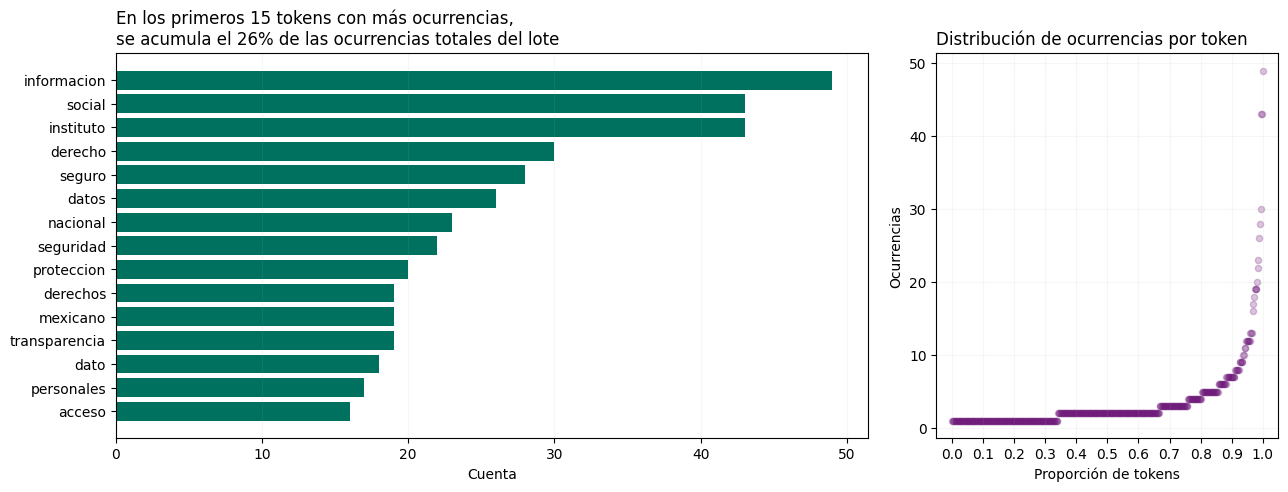

In [47]:
# Especificaciones generales
fig = plt.figure(figsize=(15,5))
gs = plt.GridSpec(nrows=1, ncols=3, figure=fig, wspace=0.2, hspace=0.2)

# ---- Primera gráfica del grid ----
n = 15
cum_prop = corpus.tail(n).prop.sum()

# Espacio en figura general
ax1 = fig.add_subplot(gs[0,:2])

# Visualización
ax1.barh(
    y=corpus.tail(n).token
    ,width=corpus.tail(n).cuenta
    ,color=config['main']['tema']['verde']
)

# Anotaciones y estilo
ax1.set_title(
    f'En los primeros {n} tokens con más ocurrencias,\nse acumula el {cum_prop*100:.0f}% de las ocurrencias totales del lote'
    ,loc='left')
ax1.set_xlabel('Cuenta')
ax1.grid(axis='x', alpha=0.1)

# ---- Segunda gráfica del grid ----

# # Espacio en figura general
ax2 = fig.add_subplot(gs[:,2])

ax2.scatter(
    x=corpus.f
    ,y=corpus.cuenta
    ,s=20
    ,color=config['main']['tema']['morado']
    ,alpha=0.25
)

# Anotaciones y estilo
ax2.set_title('Distribución de ocurrencias por token', loc='left')
ax2.set_xlabel('Proporción de tokens')
ax2.set_ylabel('Ocurrencias')
ax2.set_xticks(np.arange(0,1.1,0.1))
ax2.grid(alpha=0.1)

plt.show()